In [2]:
%matplotlib inline
import netCDF4
import pandas as pd
import numpy as np
from glob import glob
from datetime import datetime, timedelta
import os

First, we need to point python to place where we unzipped the data:

In [3]:
data_dir = '../data/NUV-MUV-NIR/'

Now we can use glob to search for .nc files.

In [4]:
# Note that this is just MUV.
# by changing the last directory in the search we can get NUV or NIR too.
filenames = glob(data_dir+'/*/*/*/MUV/*.nc')
print(filenames[:3])

['../data/NUV-MUV-NIR/VITMO_results_20150709_1957/RAIDS/RAIDS_MUV/MUV/raids_muv_20100721_v1.1.nc', '../data/NUV-MUV-NIR/VITMO_results_20150709_1957/RAIDS/RAIDS_MUV/MUV/raids_muv_20100612_v1.1.nc', '../data/NUV-MUV-NIR/VITMO_results_20150709_1957/RAIDS/RAIDS_MUV/MUV/raids_muv_20101124_v1.1.nc']


I'm not very familiar with netCDF, but it seems like it also has some nice features. Let's see what fields are available from the data:

In [5]:
datasets = [netCDF4.Dataset(fname,filling=True) for fname in filenames]

# print(datasets[0].variables)
ds = datasets[1]
for v in ds.variables: print(v,ds[v][:].shape,end=', ')

YEAR (1,), MONTH (1,), DAY (1,), DAY_OF_YEAR (1,), JD (2085,), GMST_HOUR (2085,), UT_HOUR (2085,), MET (2085,), LOOK_AZ (2085,), LOOK_ZA (2085,), LOOK_RA (2085,), LOOK_DEC (2085,), ISS_LAT (2085,), ISS_LON (2085,), ISS_ALT (2085,), ISS_RE (2085,), ISS_SZA (2085,), SS_LAT (2085,), SS_LON (2085,), TANPT_LAT (2085,), TANPT_LON (2085,), TANPT_ALT (2085,), TANPT_RE (2085,), TANPT_SZA (2085,), TANPT_ALT_ERR (1,), FULL_SCAN (2085,), START_GRAT_POS (2085,), END_GRAT_POS (2085,), INTEGRATION_TIME (1,), MUV_RES (1,), MUV_WL (875,), MUV_SENS (875,), MUV_RAW (2085, 875), MUV_INTEN (2085, 875), 

# Loading the data into a time series of spectra:

In [6]:
from raids_helper.io import raids_data_framer

framer = raids_data_framer(data_dir)
df = framer.get_spectrum_time_series('MUV')

In [7]:
# df.index.names=[None]
# df.set_index(["YEAR","MONTH","DAY","UT_HOUR"])

# The first five rows and columns of the data:
df.iloc[-5:,-5:]

MUV_WL,3145.15771484,3146.5324707,3147.90698242,3149.28125,3150.65600586
TIMESTAMP,,,,,
2010-09-04 23:55:50,41.602757,0.000000,0.000000,0.00000,0
2010-09-04 23:56:16,0.000000,41.864548,41.923122,42.35714,0
2010-09-04 23:56:41,0.000000,0.000000,0.000000,0.00000,0
2010-09-04 23:57:21,0.000000,0.000000,0.000000,0.00000,0
2010-09-04 23:59:04,0.000000,0.000000,0.000000,0.00000,0


# Plotting/indexing examples
Avoid `df.plot()` without slicing out any parts because it may crash the notebook. Instead, choose small pieces to look at.

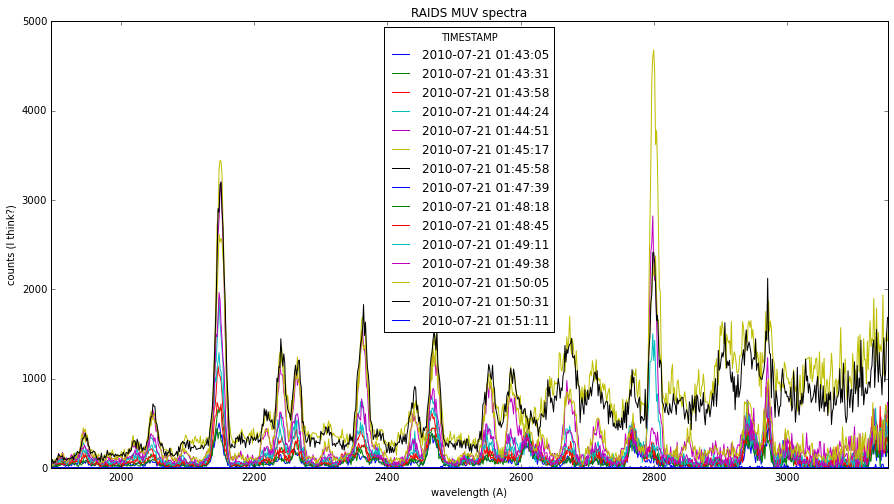

In [33]:
small_piece = df.iloc[95:110,:]
ax=small_piece.T.plot(figsize=(15,8))
ax.set_title("RAIDS MUV spectra")
ax.set_xlabel("wavelength (A)")
ax.set_ylabel("counts (I think?)");

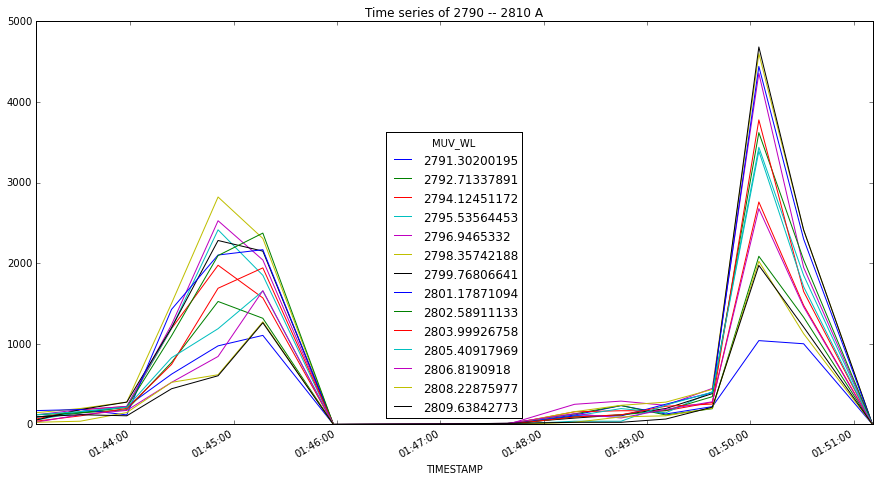

In [34]:
ax = small_piece.loc[:,2790:2810].plot(figsize=(15,8))
ax.set_title("Time series of 2790 -- 2810 A");